## Entrega avance 2 proyecto final vision de máquina
### Juan Daniel  Sarmiento Abello 1000331954

In [31]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.image as mpimg

from scipy.signal import convolve2d as conv2

#from skimage import data, io, filters
#from skimage import color, restoration
#from skimage.util import random_noise, img_as_float

#from skimage import exposure
from scipy import misc
 


### Cargue de imagenes

In [33]:
# La misma imagen diferente polarización, oscuras
#imge1 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Oscuras/subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png')
#imge2 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Oscuras/subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VV.png')

#Imagenes diferentes, oscuras
imge1 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Oscuras/subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png')
imge2 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Oscuras/subset_4_of_S1B_IW_GRDH_1SDV_20191225T104227_20191225T104252_019520_024E29_E68E_Orb_Cal_TC_Sigma0_VV.png')

#Imagenes diferentes, claras
#imge1 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Claras/subset_2_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VH - 1TK44hWaqz5LjT5_gg_KDjIPGg3_x9fqF.png')
#imge2 = cv2.imread('/home/juan/Documentos/VisionDeMaquina/ProyectoFinal/PreProcesado/SetDeDatos2/Claras/subset_2_of_S1A_IW_GRDH_1SDV_20220326T104318_20220326T104343_042491_05114F_58EA_Orb_Cal_TC_Sigma0_VH.png')


### Funciones utilizadas

In [34]:
# Funcion histograma
def histograma(ImG, MatrizRGB):
    MatrizRGB = ('b','g','r')
    for i,color in enumerate(MatrizRGB):
        hist = cv2.calcHist([imGGris],[i],None,[256],[0,256])
        plt.plot(hist,color = color)
    plt.title('Histograma')
    plt.show()
    
def gamma_filter(matrix, gamma):
    # Apply gamma correction to each pixel in the matrix
    gamma_corrected_matrix = np.power(matrix, gamma)
    return gamma_corrected_matrix


def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance**2 / (img_variance**2 + overall_variance**2)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

def gamma_filter(matrix, gamma):
    # Apply gamma correction to each pixel in the matrix
    gamma_corrected_matrix = np.power(matrix, gamma)
    return gamma_corrected_matrix



def AclararImg(IM):
    kernel2 = np.ones((2,2))
    return  cv2.filter2D(IM,-1,kernel2)
    

def sif_t(I):
    #gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(I,None)
    kp2,des = sift.compute(I,kp)
    
    return cv2.drawKeypoints(I,kp,I,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

### Filtrado

In [40]:
imgCl1 = AclararImg(imge1)
imgCl2 = AclararImg(imge2)

cv2.imshow('imgF2',imgCl1)
cv2.imshow('imgF3',imgCl2)
cv2.imshow('imGGris',imge1)
cv2.imshow('imGGris1',imge2)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

## Umbralización

In [36]:
_, imgCl1 = cv2.threshold(imgCl1,55,255, cv2.THRESH_BINARY)
_, imgCl2 = cv2.threshold(imgCl2,55,255, cv2.THRESH_BINARY)
cv2.imshow('imGGris',imgCl1)
cv2.imshow('imGGris1',imgCl2)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

## Método 1 para calcular los descriptores

-1

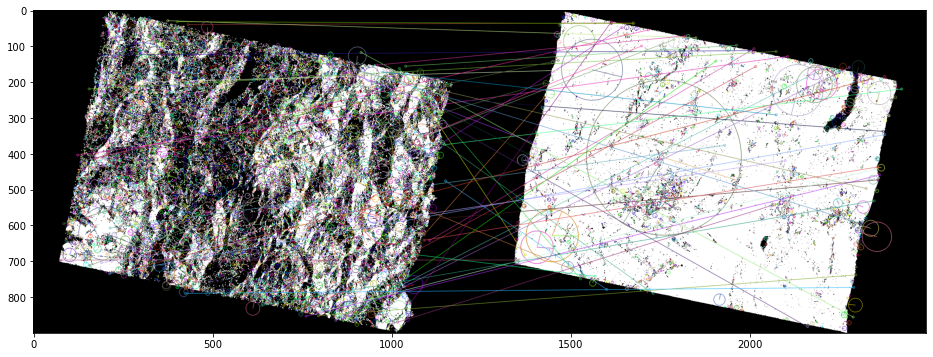

In [37]:
IMgft1 = sif_t(imgCl1)
IMgft2 = sif_t(imgCl2)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(imgCl1, keypoints_1, imgCl2, keypoints_2, matches[:50], imgCl2, flags=2)

figure, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.imshow(img3, cmap='gray')

print(descriptors_1,descriptors_2)

cv2.imshow('sif_t1',IMgft1)
cv2.imshow('sif_t2',IMgft2)
cv2.waitKey(0)


## Método 2 para calcular los descriptores

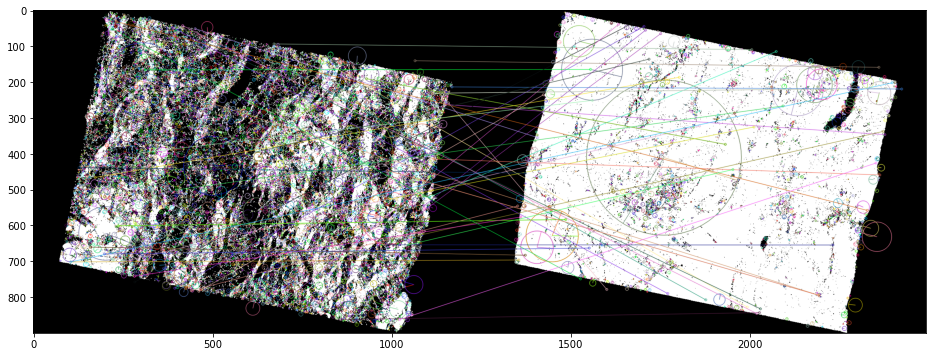

In [39]:
sift = cv2.SIFT_create()
keypoints_1, descriptors_1=sift.detectAndCompute(imgCl1,None) 
keypoints_1, descriptors_1=sift.detectAndCompute(imgCl2,None) 

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(imgCl1, keypoints_1, imgCl2, keypoints_2, matches[:50], imgCl2, flags=2)

figure, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.imshow(img3, cmap='gray')

#cv2.imshow('sif_t1',IMgft1)
#cv2.imshow('sif_t2',IMgft2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#print(descriptors_1,descriptors_2)

#plt.show()
#cv2.imshow('sift',img3)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [26]:
#sift = cv2.SIFT_create()
#keypoints_1 = sift.detect(imgCl1,None)#Puntos clave
#keypoints_1,descriptors_1 = sift.compute(imgCl1,keypoints_1)#Descriprotes
#RV= cv2.drawKeypoints(imgCl1,keypoints_1,imgCl1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


#keypoints_2 = sift.detect(imgCl2,None)#Puntos clave
#keypoints_2,descriptors_2 = sift.compute(imgCl2,keypoints_2)#Descriprotes
#RV2= cv2.drawKeypoints(imgCl2,keypoints_2,imgCl2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [79]:
#def sif_t2(I):
#    sift = cv2.SIFT_create()
#    #gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
#    keypoints_1 = sift.detect(imgCl1,None)#Puntos clave
#    keypoints_1,descriptors_1 = sift.compute(imgCl1,keypoints_1)#Descriprotes
#    RV= cv2.drawKeypoints(imgCl1,keypoints_1,imgCl1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#    return[keypoints_1,keypoints_2,descriptors_1,descriptors_2,RV]
